# Proyek Analisis Data: Bike Sharing System
- **Nama:** Syahel Rusfi Razaba
- **Email:** syahel.razaba@gmail.com
- **ID Dicoding:** MC224D5Y0239

## Menentukan Pertanyaan Bisnis

Sistem berbagi sepeda (*Bike Sharing System*) adalah inovasi penyewaan sepeda yang otomatis, memungkinkan pengguna menyewa di satu lokasi dan mengembalikannya di lokasi lain. Sistem ini penting untuk mengatasi masalah lalu lintas, lingkungan, dan kesehatan.

Sumber data: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

Objektif:
- Apakah ada pola musiman dalam penyewaan sepeda
- Bagaimana tren penyewaan dari waktu ke waktu?
- Bagaimana tren penyewaan sepeda untuk untuk pengguna biasa (*casual*) dan terdaftar (*registered*)? Apakah ada perbedaan?
- Apakah kondisi lingkungan seperti suhu, kelembapan, dsb berpengaruh terhadap penyewa sepeda?

## Import Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load datasets
day_df = pd.read_csv('https://github.com/syahelrusfi21/Bike-Sharing-Analysis/raw/main/day.csv')
hour_df = pd.read_csv('https://github.com/syahelrusfi21/Bike-Sharing-Analysis/raw/main/hour.csv')

In [3]:
# Display first few rows of "day" dataset
print(day_df.shape)
day_df.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Display first few rows of "hour" dataset
print(hour_df.shape)
hour_df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Data Understanding**
- **instant**: indeks data  
- **dteday**: tanggal  
- **season**: musim (1:spring, 2:summer, 3:fall, 4:winter)  
- **yr**: tahun (0: 2011, 1: 2012)  
- **mnth**: bulan (1 hingga 12)  
- **hr**: jam (0 hingga 23)  
- **holiday**: apakah hari tersebut merupakan hari libur atau bukan (diambil dari http://dchr.dc.gov/page/holiday-schedule)  
- **weekday**: hari dalam seminggu  
- **workingday**: jika hari tersebut bukan akhir pekan atau hari libur, nilainya 1; jika tidak, nilainya 0  
- **weathersit**:
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
- **temp**: Suhu yang dinormalisasi dalam Celsius (nilai dibagi dengan 41 sebagai nilai maksimum)  
- **atemp**: Suhu yang dirasakan secara dinormalisasi dalam Celsius (nilai dibagi dengan 50 sebagai nilai maksimum)  
- **hum**: Kelembapan yang dinormalisasi (nilai dibagi dengan 100 sebagai nilai maksimum)  
- **windspeed**: Kecepatan angin yang dinormalisasi (nilai dibagi dengan 67 sebagai nilai maksimum)  
- **casual**: jumlah pengguna kasual  
- **registered**: jumlah pengguna terdaftar  
- **cnt**: jumlah total penyewaan sepeda, termasuk pengguna kasual dan terdaftar  

### Assessing Data

In [5]:
# Display basic info
print("Day Dataset Info:")
day_df.info()
print("\nHour Dataset Info:")
hour_df.info()

Day Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Hour Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379

Terlihat bahwa tipe data dari beberapa variabel pada kedua dataset belum sesuai dengan yang seharusnya, sebagaimana tercantum dalam tahap "Data Understanding". Oleh karena itu, pada langkah selanjutnya, kita akan mengonversi tipe data dari beberapa variabel agar sesuai dengan tujuan analisis.

In [6]:
# Convert "dteday" column to datetime format
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Convert categorical variables to category dtype
categorical_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
day_df[categorical_columns] = day_df[categorical_columns].astype("category")
hour_df[categorical_columns + ["hr"]] = hour_df[categorical_columns + ["hr"]].astype("category")

# Display dataset information
print("Day Dataset Info:")
day_df.info()
print("\nHour Dataset Info:")
hour_df.info()

print("\nSekarang tipe data sudah sesuai dengan keterangan yang terdapat dalam 'Data Understanding'.")

Day Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: categ

Karena beberapa variabel pada kedua dataset telah dinormalisasi, maka untuk mempermudah interpretasi, data akan dikembalikan ke skala aslinya melalui proses denormalisasi. Dengan demikian, nilai asli dari setiap variabel akan lebih mudah dipahami.

In [7]:
# Convert normalized values back to original scale
day_df["temp"] = day_df["temp"] * (39 - (-8)) + (-8)  # Convert to Celsius
day_df["atemp"] = day_df["atemp"] * (50 - (-16)) + (-16)  # Convert to 'feels-like' temperature in Celsius
day_df["hum"] = day_df["hum"] * 100  # Convert humidity to percentage (%)
day_df["windspeed"] = day_df["windspeed"] * 67  # Convert wind speed to actual scale

hour_df["temp"] = hour_df["temp"] * (39 - (-8)) + (-8)
hour_df["atemp"] = hour_df["atemp"] * (50 - (-16)) + (-16)
hour_df["hum"] = hour_df["hum"] * 100
hour_df["windspeed"] = hour_df["windspeed"] * 67

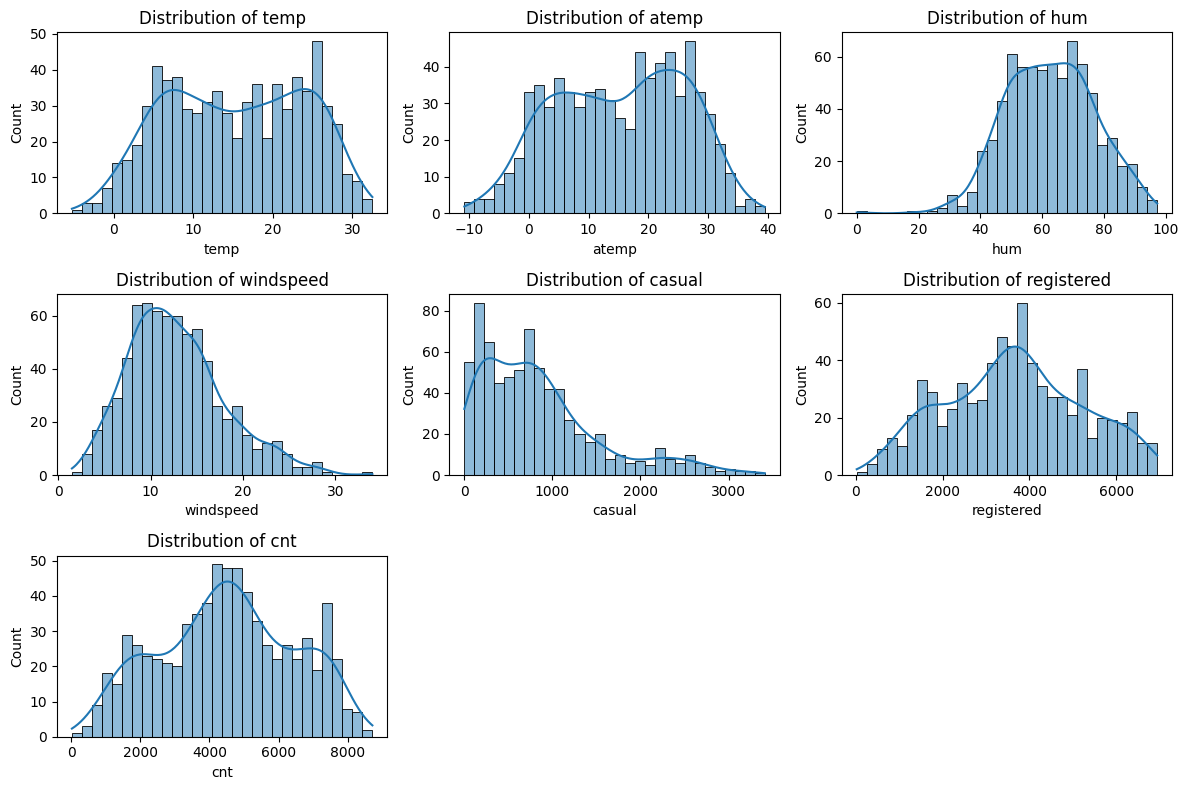

In [8]:
# Check for noise (invalid data) in "day" dataset

# Select numerical columns
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Plot the distribution of numerical data
plt.figure(figsize=(12, 8))  # Set figure size
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Create subplots in a 3x3 grid
    sns.histplot(day_df[col], bins=30, kde=True)  # Plot histogram with KDE
    plt.title(f'Distribution of {col}')  # Set title for each plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

Berdasarkan distribusi masing-masing variabel numerik dalam dataset *day*, dapat diasumsikan sementara bahwa tidak terdapat *noise* atau data yang tidak valid dalam dataset ini. Beberapa nilai yang berada jauh dari rentang distribusi kemungkinan merupakan pencilan (*outlier*), yang secara alami sering muncul dalam data.

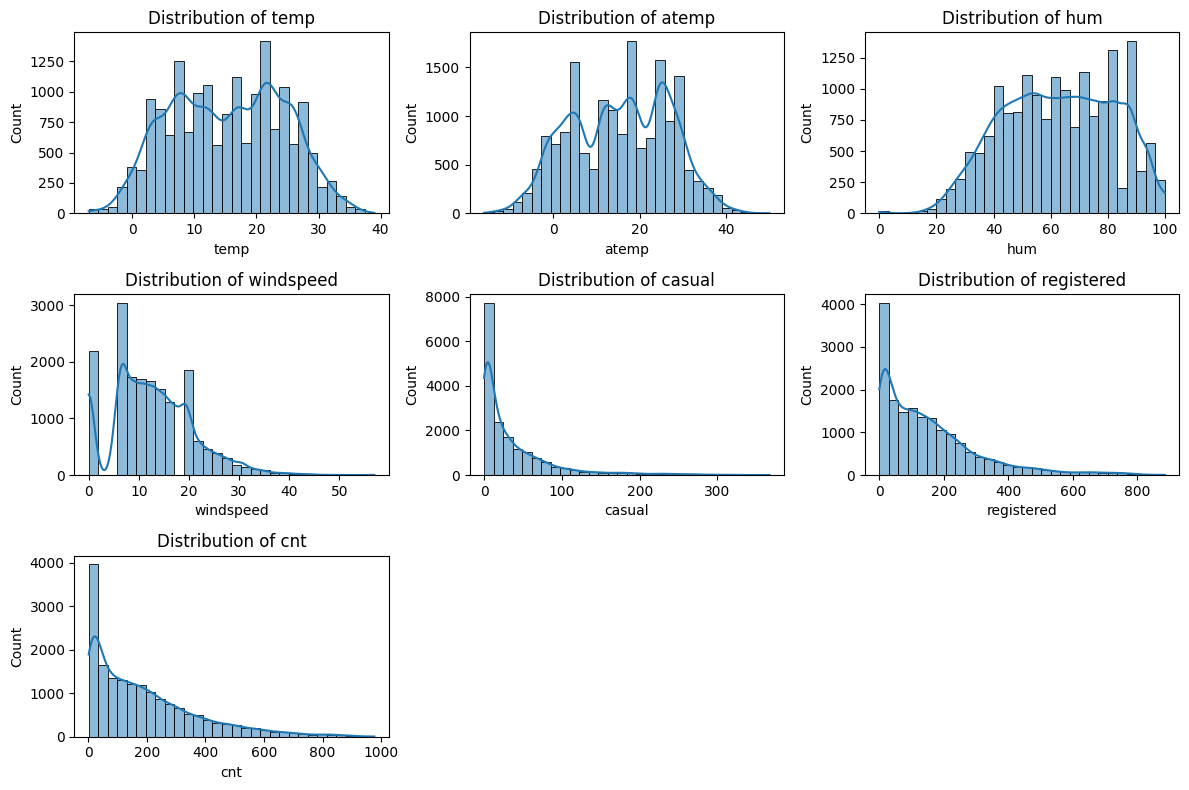

In [9]:
# Check for noise (invalid data) in "hour" dataset

# Select numerical columns
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Plot the distribution of numerical data
plt.figure(figsize=(12, 8))  # Set figure size
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Create subplots in a 3x3 grid
    sns.histplot(hour_df[col], bins=30, kde=True)  # Plot histogram with KDE
    plt.title(f'Distribution of {col}')  # Set title for each plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

Sama seperti pada dataset *day*, berdasarkan distribusi variabel numerik dalam dataset *hour*, tidak ditemukan indikasi adanya noise atau data yang tidak valid. Beberapa nilai ekstrem yang berada jauh dari rentang distribusi kemungkinan merupakan pencilan (*outlier*), yang secara alami dapat muncul dalam data.

Namun, ada satu variabel yang menarik untuk dicermati, yaitu windspeed, di mana terdapat sejumlah nilai 0. Menurut National Weather Service (https://www.weather.gov/pqr/wind), kecepatan angin bernilai 0 dapat terjadi dalam kondisi yang sangat tenang (*calm*). Oleh karena itu, penting untuk mempertimbangkan apakah nilai tersebut memang valid ataukah ada kemungkinan terjadi kesalahan dalam pencatatan data.

Berdasarkan visualisasi, kondisi *windspeed* bernilai 0 muncul dengan frekuensi yang cukup tinggi, bahkan hingga ribuan kali. Jika kita menghapus atau mengganti nilai tersebut, informasi dalam data bisa berkurang secara signifikan. Terlebih lagi, karena dataset ini berskala jam (*hourly*), dalam satu hari tertentu bisa saja terjadi periode dengan kondisi angin yang sangat tenang. Oleh karena itu, kita mengasumsikan bahwa nilai 0 pada *windspeed* bukanlah *noise*, melainkan kondisi alamiah—misalnya, saat tengah malam ketika angin cenderung lebih tenang.

In [10]:
# List of categorical columns
categorical_columns_day = ["season", "weathersit", "yr", "mnth", "holiday", "weekday", "workingday"]
categorical_columns_hour = ["season", "weathersit", "yr", "mnth", "hr", "holiday", "weekday", "workingday"]

# Check unique values in each categorical column for "day" dataset
print('Check unique values in each categorical column for "day" dataset')
for col in categorical_columns_day:
    unique_values = day_df[col].unique()
    print(f"Unique values in '{col}': {list(unique_values)}")

# Check unique values in each categorical column for "hour" dataset
print('\nCheck unique values in each categorical column for "hour" dataset')
for col in categorical_columns_hour:
    unique_values = hour_df[col].unique()
    print(f"Unique values in '{col}': {list(unique_values)}")

Check unique values in each categorical column for "day" dataset
Unique values in 'season': [1, 2, 3, 4]
Unique values in 'weathersit': [2, 1, 3]
Unique values in 'yr': [0, 1]
Unique values in 'mnth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Unique values in 'holiday': [0, 1]
Unique values in 'weekday': [6, 0, 1, 2, 3, 4, 5]
Unique values in 'workingday': [0, 1]

Check unique values in each categorical column for "hour" dataset
Unique values in 'season': [1, 2, 3, 4]
Unique values in 'weathersit': [1, 2, 3, 4]
Unique values in 'yr': [0, 1]
Unique values in 'mnth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Unique values in 'hr': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Unique values in 'holiday': [0, 1]
Unique values in 'weekday': [6, 0, 1, 2, 3, 4, 5]
Unique values in 'workingday': [0, 1]


Untuk variabel kategorikal dalam dataset *day* maupun *hour*, tidak ditemukan indikasi adanya *noise*, karena semua nilai unik yang terdapat dalam data sesuai dengan keterangan pada tahap "data understanding".

In [11]:
# Check for missing values
print("Missing values in day dataset:")
print(day_df.isnull().sum())

print("\nMissing values in hour dataset:")
print(hour_df.isnull().sum())

Missing values in day dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in hour dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil pengecekan, tidak ditemukan missing values pada kedua dataset (*day* dan *hour*). Hal ini menunjukkan bahwa data sudah cukup bersih dan tidak memerlukan imputasi nilai yang hilang. Oleh karena itu, kita dapat langsung melanjutkan ke tahap analisis tanpa perlu menangani data yang tidak lengkap.

In [12]:
# Check for duplicated data
print(f"Duplicated data in day dataset: {day_df.duplicated().sum()}")
print(f"Duplicated data in hour dataset: {hour_df.duplicated().sum()}")

Duplicated data in day dataset: 0
Duplicated data in hour dataset: 0


Hasil pengecekan menunjukkan bahwa tidak terdapat data duplikat pada kedua dataset (*day* dan *hour*). Dengan demikian, setiap entri dalam dataset bersifat unik, sehingga kita dapat langsung melanjutkan ke tahap analisis tanpa perlu melakukan proses penghapusan duplikasi.

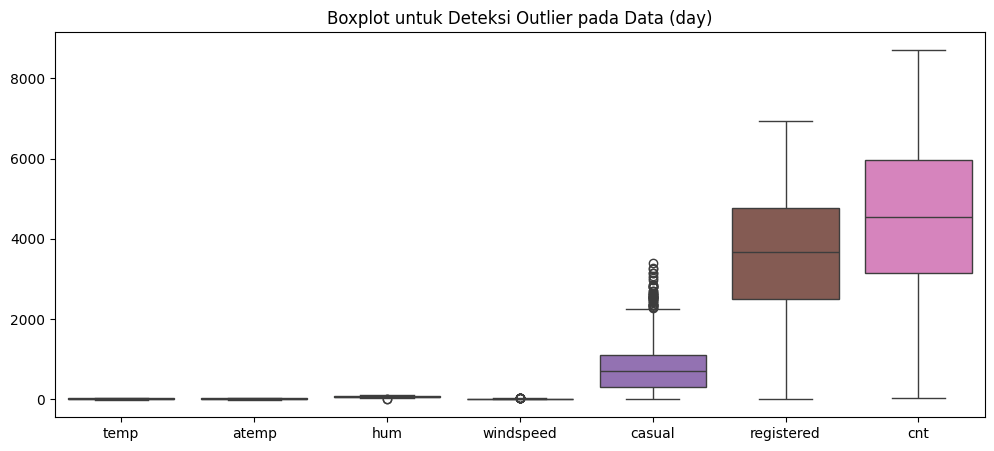

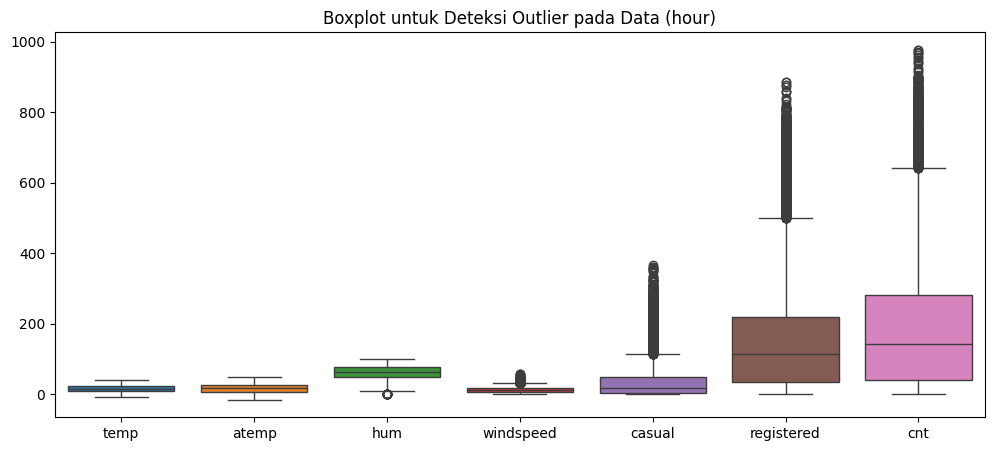

In [13]:
# Check for outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=day_df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]])
plt.title("Boxplot untuk Deteksi Outlier pada Data (day)")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=hour_df[["temp", "atemp", "hum", "windspeed", "casual", "registered","cnt"]])
plt.title("Boxplot untuk Deteksi Outlier pada Data (hour)")
plt.show()

Terlihat adanya outlier pada kedua dataset. Pada dataset *day*, outlier ditemukan pada variabel "hum", "windspeed", dan "casual". Sementara itu, pada dataset *hour*, outlier terdeteksi pada variabel "hum", "windspeed", "casual", "registered", dan "cnt".

Beberapa variabel tampak sangat kecil dalam visualisasi karena perbedaan skala antar variabel. Oleh karena itu, saya akan memisahkan variabel yang berskala kecil agar outlier lebih terlihat dengan jelas.

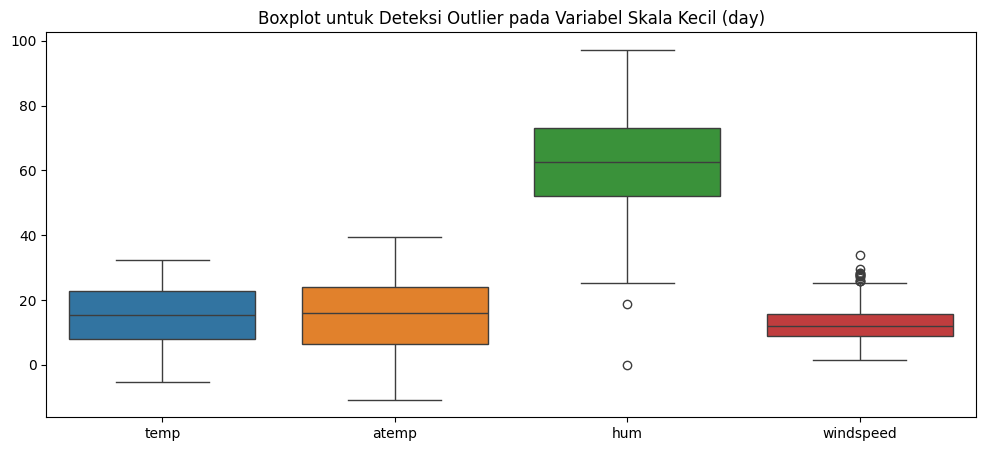

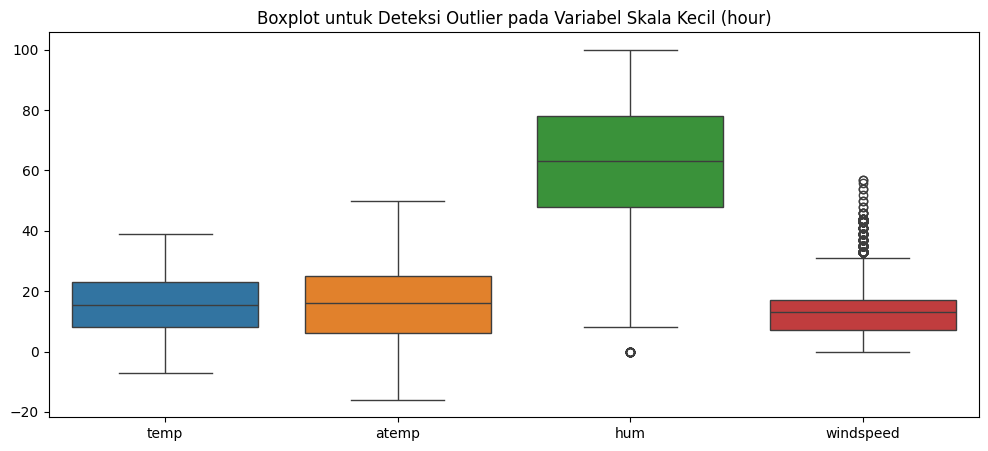

In [14]:
# Boxplot for small-scale variables in the "day" dataset
plt.figure(figsize=(12, 5))
sns.boxplot(data=day_df[["temp", "atemp", "hum", "windspeed"]])
plt.title("Boxplot untuk Deteksi Outlier pada Variabel Skala Kecil (day)")
plt.show()

# Boxplot for small-scale variables in the "hour" dataset
plt.figure(figsize=(12, 5))
sns.boxplot(data=hour_df[["temp", "atemp", "hum", "windspeed"]])
plt.title("Boxplot untuk Deteksi Outlier pada Variabel Skala Kecil (hour)")
plt.show()

Oke, kini outlier pada variabel dengan skala kecil terlihat lebih jelas. Namun, perlu diingat bahwa kita harus berhati-hati dalam menangani outlier dan tidak serta-merta langsung menghapusnya, karena hal tersebut dapat mengurangi banyak informasi dari data. Penanganan outlier perlu dilakukan melalui analisis lebih lanjut untuk memastikan apakah nilai-nilai tersebut masih masuk akal atau memang terjadi kesalahan pencatatan.

Pada kasus ini, jika kita lihat berdasarkan visualisasi boxplot, nilai outlier masih dapat diterima, karena ada kemungkinan jumlah penyewa sepeda melonjak pada jam atau hari tertentu. Hal yang sama berlaku untuk faktor lingkungan, di mana nilai-nilai yang muncul masih dalam rentang yang wajar. Oleh karena itu, dalam analisis ini, saya akan membiarkan outlier sebagaimana adanya. Namun, jika nanti kita melakukan pemodelan *machine learning* atau analisis lanjutan lainnya, kita dapat mempertimbangkan transformasi data untuk menangani outlier agar tidak menyebabkan bias pada model.

### Cleaning Data

Pada tahap ini, kita akan melakukan pembersihan data yang sebelumnya telah kita evaluasi. Seperti yang diketahui, kedua dataset, baik *day* maupun *hour*, tidak memiliki *missing values*, duplikasi data, atau *noise*. Oleh karena itu, kita dapat langsung melanjutkan ke tahap analisis berikutnya.

## Exploratory Data Analysis (EDA)

Sebelum memulai eksplorasi dataset, ada baiknya kita melakukan sedikit perubahan pada nama beberapa variabel agar lebih mudah dipahami. Lalu jika kita lihat, kedua dataset pada dasarnya sama, hanya saja untuk hour dataset lebih detail karena mencakup data dalam jam. Sehingga kita bisa menggunakan salah satu dari dataset tersebut ataupun keduanya.

In [15]:
# Rename columns of daily dataset for better readability
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'cnt': 'total_rentals',
    'casual': 'casual_rentals',
    'registered': 'registered_rentals'
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature,feeling_temperature,humidity,wind_speed,casual_rentals,registered_rentals,total_rentals
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


In [16]:
# Rename columns of hourly dataset for better readability
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'cnt': 'total_rentals',
    'casual': 'casual_rentals',
    'registered': 'registered_rentals'
}, inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,feeling_temperature,humidity,wind_speed,casual_rentals,registered_rentals,total_rentals
0,1,2011-01-01,1,0,1,0,0,6,0,1,3.28,3.0014,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,2.34,1.9982,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,2.34,1.9982,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3.28,3.0014,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,3.28,3.0014,75.0,0.0,0,1,1


In [17]:
# Descriptive Statistics
hour_df = hour_df.drop(columns=['instant']) # Remove "instant" variable since it just an index
print("📊 Summary Statistics:")
display(hour_df.describe())

📊 Summary Statistics:


,date,temperature,feeling_temperature,humidity,wind_speed,casual_rentals,registered_rentals,total_rentals
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,15.500000,15.996800,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,23.020000,24.999200,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,9.050138,11.342114,19.292983,8.196795,49.305030,151.357286,181.387599


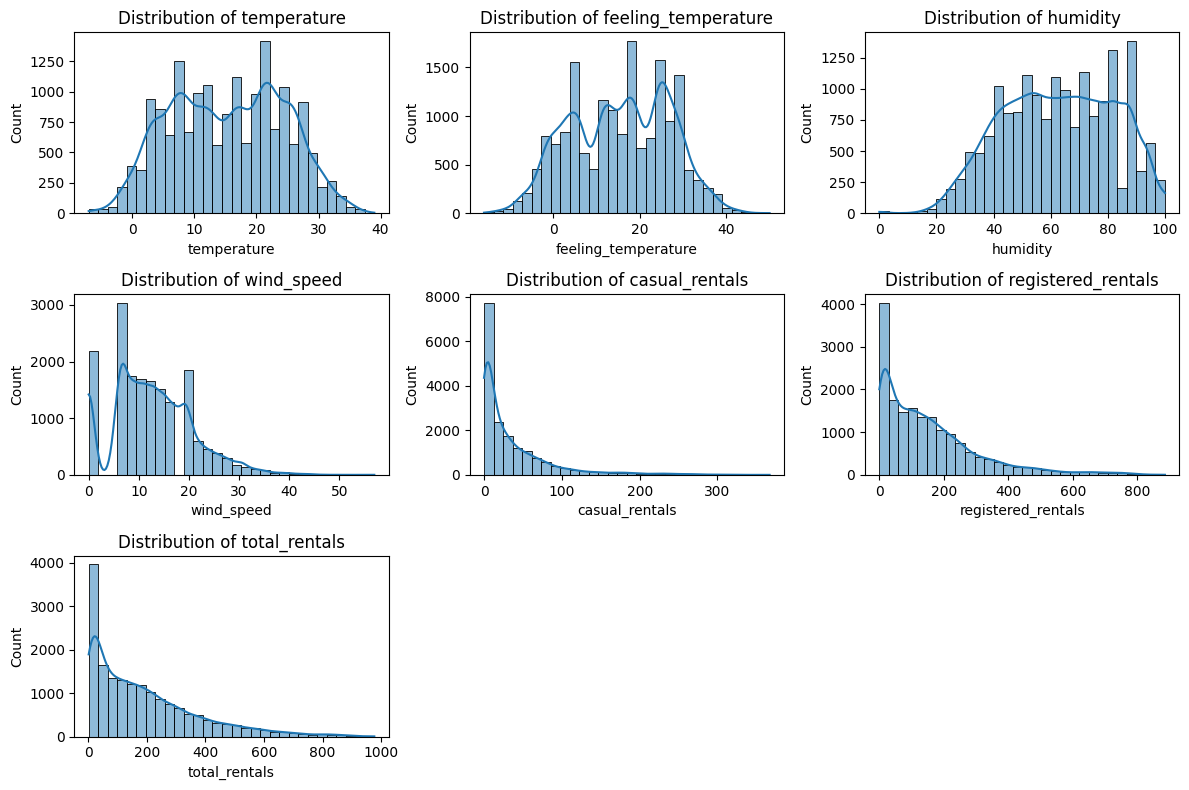

In [18]:
# Select only numerical columns
num_cols = ['temperature', 'feeling_temperature', 'humidity', 'wind_speed', 'casual_rentals', 'registered_rentals', 'total_rentals']

# Plot the distribution for each numerical variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(hour_df[col], bins=30, kde=True)  # Histogram + KDE
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<ipython-input-19-02e9d0eb87f4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_rental = hour_df.groupby("year")["total_rentals"].sum().reset_index()


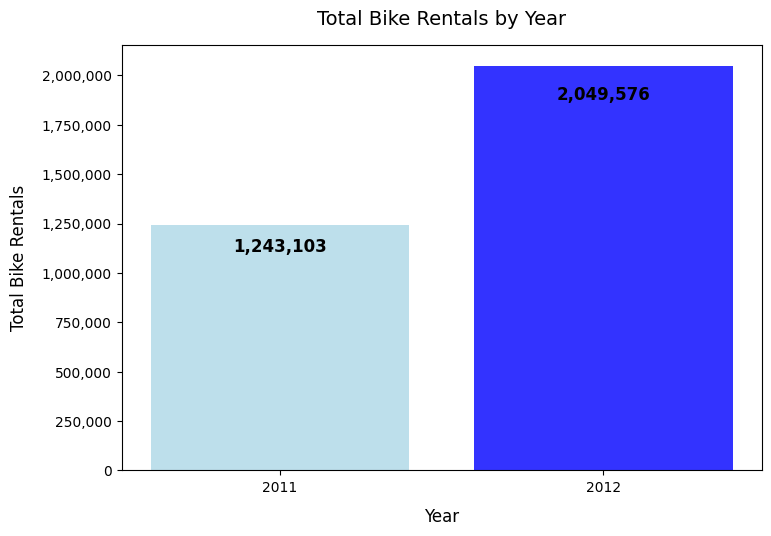

In [19]:
# Aggregate total rentals by year
year_rental = hour_df.groupby("year")["total_rentals"].sum().reset_index()

# Map directly to new column for human-readable labels
year_rental["year_label"] = year_rental["year"].map({0: "2011", 1: "2012"})

# Plot Bar Chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(year_rental["year_label"], year_rental["total_rentals"],
              color=["lightblue", "blue"], alpha=0.8)

# Add labels above each bar with a downward offset
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval - (yval * 0.05),  # Shift slightly downward (5% of height)
            f"{yval:,}", ha="center", va="top", fontsize=12, fontweight="bold", color="black")

# Format the Y-axis to display whole numbers without scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Add title and axis labels
ax.set_title("Total Bike Rentals by Year", fontsize=14, pad=15)
ax.set_xlabel("Year", fontsize=12, labelpad=10)
ax.set_ylabel("Total Bike Rentals", fontsize=12, labelpad=10)

# Adjust layout to avoid overcrowding
plt.subplots_adjust(left=0.15, right=0.95, top=1.0, bottom=0.15)

plt.show()

Berdasarkan visualisasi di atas, penyewa sepeda pada tahun 2011 dan 2012 menunjukkan peningkatan yang cukup signifikan, yang mengindikasikan bahwa sistem penyewaan sepeda ini ada peningkatan popularitas dibanding tahun sebelumnya.

<ipython-input-20-14676bdf997d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_rental = hour_df.groupby("workingday")["total_rentals"].sum().reset_index()


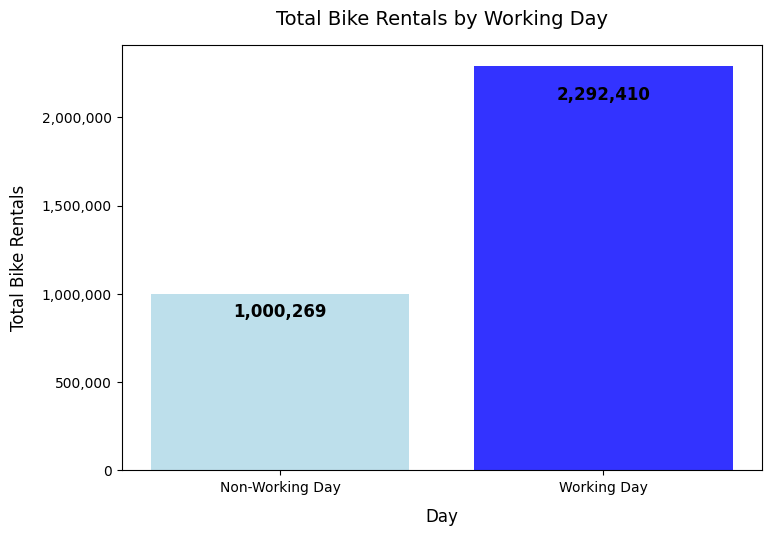

In [20]:
# Aggregate total rentals by working day
workingday_rental = hour_df.groupby("workingday")["total_rentals"].sum().reset_index()

# Map directly to new column for human-readable labels
workingday_rental["workingday"] = workingday_rental["workingday"].map({0: "Non-Working Day", 1: "Working Day"})

# Plot Bar Chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(workingday_rental["workingday"], workingday_rental["total_rentals"], color=["lightblue", "blue"], alpha=0.8)

# Add labels above each bar with a downward offset
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - (yval * 0.05),  # Shift slightly downward (5% of height)
            f"{yval:,}", ha="center", va="top", fontsize=12, fontweight="bold", color="black")

# Format the Y-axis to display whole numbers without scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Add title and axis labels
ax.set_title("Total Bike Rentals by Working Day", fontsize=14, pad=15)
ax.set_xlabel("Day", fontsize=12, labelpad=10)
ax.set_ylabel("Total Bike Rentals", fontsize=12, labelpad=10)

# Adjust layout to avoid overcrowding
plt.subplots_adjust(left=0.15, right=0.95, top=1.0, bottom=0.15)

plt.show()

Berdasarkan visualisasi di atas, distribusi hari kerja (*working day*) lebih tinggi dibandingkan dengan hari non-kerja (*non-working day*). Hal ini merupakan insight yang menarik, karena menunjukkan bahwa penyewaan sepeda lebih sering dilakukan pada hari kerja. Fenomena ini cukup wajar, mengingat kemungkinan banyak orang memilih menggunakan sepeda sebagai alat transportasi untuk bekerja, dibandingkan kendaraan lain. Sebaliknya, pada hari non-kerja, seperti hari libur atau perayaan, jumlah penyewaan sepeda cenderung lebih sedikit. Insight ini dapat menjadi pertimbangan bagi perusahaan untuk memaksimalkan potensi penyewaan sepeda pada hari kerja, mengingat tingginya permintaan di hari-hari tersebut.

<ipython-input-21-34f4d2a460c3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_rental = hour_df.groupby("holiday")["total_rentals"].sum().reset_index()


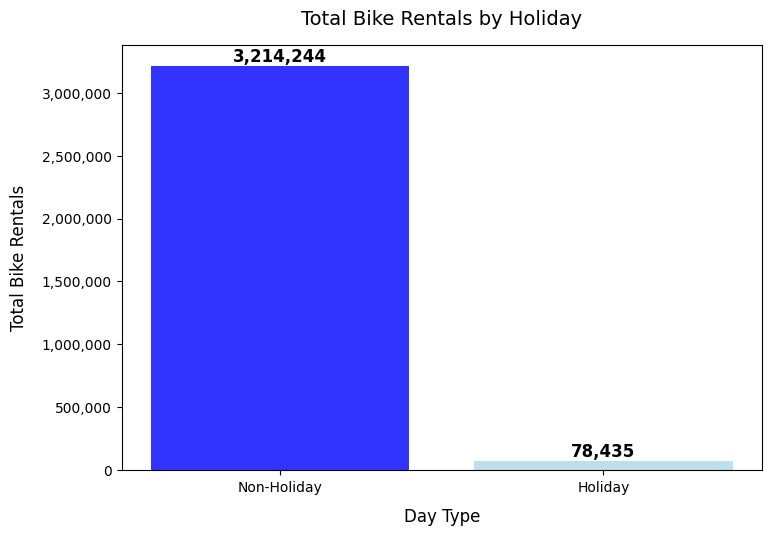

In [21]:
# Aggregate total rentals by holiday
holiday_rental = hour_df.groupby("holiday")["total_rentals"].sum().reset_index()

# Add a new column with human-readable labels using direct mapping
holiday_rental["holiday_label"] = holiday_rental["holiday"].map({0: "Non-Holiday", 1: "Holiday"})

# Plot Bar Chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(holiday_rental["holiday_label"], holiday_rental["total_rentals"],
              color=["blue", "lightblue"], alpha=0.8)

# Add labels above each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}",
            ha="center", va="bottom", fontsize=12, fontweight="bold")

# Format the Y-axis to display whole numbers without scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Add title and axis labels
ax.set_title("Total Bike Rentals by Holiday", fontsize=14, pad=15)
ax.set_xlabel("Day Type", fontsize=12, labelpad=10)
ax.set_ylabel("Total Bike Rentals", fontsize=12, labelpad=10)

# Adjust layout to avoid overcrowding
plt.subplots_adjust(left=0.15, right=0.95, top=1.0, bottom=0.15)

plt.show()

Berdasarkan visualisasi di atas, distribusi penyewaan pada hari non-libur (*non-holiday*) lebih tinggi dibandingkan dengan hari libur (*holiday*). Hal ini masuk akal, karena jika merujuk pada distribusi hari kerja (*working day*) dan non-hari kerja (*non-working day*) sebelumnya, terlihat bahwa hari kerja memiliki angka penyewaan yang lebih tinggi. Artinya, penyewaan sepeda lebih sering dilakukan pada hari-hari yang bukan hari libur.

<ipython-input-22-1691ead01acb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rental = hour_df.groupby("season")["total_rentals"].sum().reset_index()


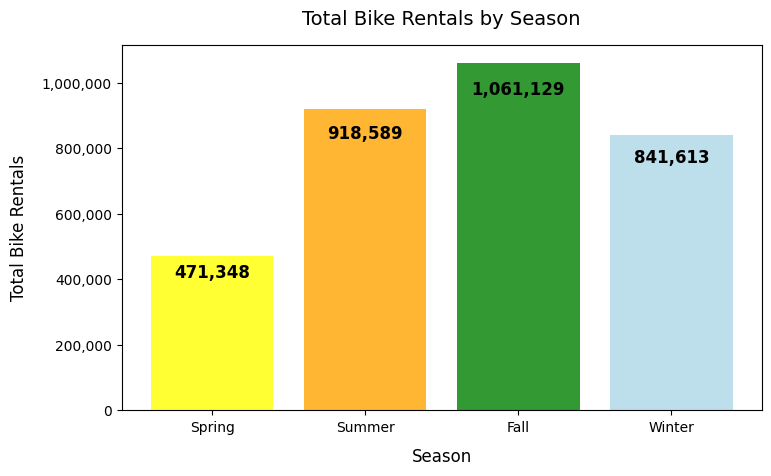

In [22]:
# Aggregate total rentals by season
seasonal_rental = hour_df.groupby("season")["total_rentals"].sum().reset_index()

# Map directly to new column with readable labels
seasonal_rental["season_label"] = seasonal_rental["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Plot Bar Chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(seasonal_rental["season_label"], seasonal_rental["total_rentals"],
              color=["yellow", "orange", "green", "lightblue"], alpha=0.8)

# Add labels above each bar with a downward offset
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - (yval * 0.05),  # Shift slightly downward (5% of height)
            f"{yval:,}", ha="center", va="top", fontsize=12, fontweight="bold", color="black")

# Format the Y-axis to display whole numbers without scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Add title and axis labels
ax.set_title("Total Bike Rentals by Season", fontsize=14, pad=15)
ax.set_xlabel("Season", fontsize=12, labelpad=10)
ax.set_ylabel("Total Bike Rentals", fontsize=12, labelpad=10)

# Adjust layout to avoid overcrowding
plt.subplots_adjust(left=0.15, right=0.95, top=0.88, bottom=0.15)

plt.show()

Berdasarkan visualisasi distribusi musim (*season*), terlihat bahwa penyewaan sepeda paling tinggi dilakukan pada musim gugur (*fall*). Sebaliknya, musim dingin dan semi menunjukkan tingkat penyewaan yang relatif lebih rendah. Meskipun begitu, perbedaan diantara keempat musim relatif tidak signifikan, pola akan terlihat jelas jika kita melihat tren musiman dari tahun ke tahun.

<ipython-input-23-3d09e35e5685>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rental = hour_df.groupby("weather_condition")["total_rentals"].sum().reset_index()


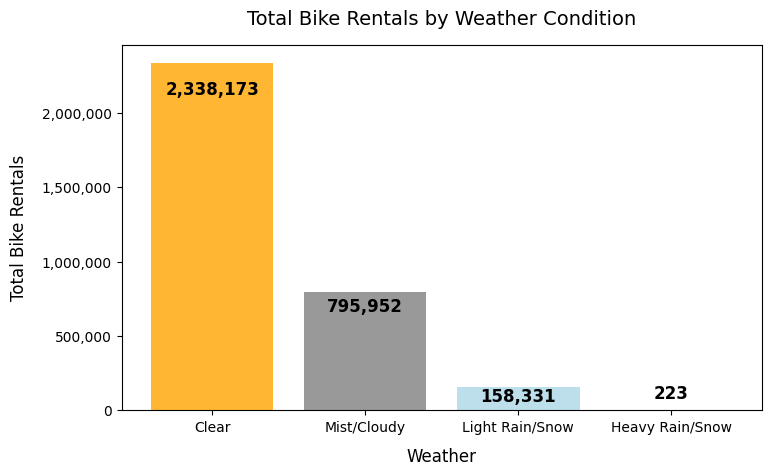

In [23]:
# Aggregate total rentals by weather condition
weather_rental = hour_df.groupby("weather_condition")["total_rentals"].sum().reset_index()

# Map directly to a new column for readable labels
weather_rental["weather_label"] = weather_rental["weather_condition"].map({
    1: "Clear",
    2: "Mist/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
})

# Plot Bar Chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(weather_rental["weather_label"], weather_rental["total_rentals"],
              color=["orange", "gray", "lightblue", "darkblue"], alpha=0.8)

# Adjust label positions to avoid overlap
for bar in bars:
    yval = bar.get_height()
    if yval > 50000:  # For large values, place label inside the bar
        ax.text(bar.get_x() + bar.get_width()/2, yval - (yval * 0.05),  # Slight downward offset
                f"{yval:,}", ha="center", va="top", fontsize=12, fontweight="bold", color="black")
    else:  # For smaller values, place label above the bar
        ax.text(bar.get_x() + bar.get_width()/2, yval + 50000,  # Adjust upward to avoid overlap
                f"{yval:,}", ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

# Format the Y-axis to display whole numbers without scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Add title and axis labels
ax.set_title("Total Bike Rentals by Weather Condition", fontsize=14, pad=15)
ax.set_xlabel("Weather", fontsize=12, labelpad=10)
ax.set_ylabel("Total Bike Rentals", fontsize=12, labelpad=10)

# Adjust layout to avoid overcrowding
plt.subplots_adjust(left=0.15, right=0.95, top=0.88, bottom=0.15)

plt.show()

Berdasarkan distribusi cuaca, terlihat bahwa penyewaan sepeda paling banyak dilakukan pada cuaca cerah (*clear*), dengan perbedaan yang cukup signifikan dibandingkan cuaca lainnya, seperti berawan, gerimis, hingga hujan lebat atau bersalju yang bahkan hampir tidak mencatatkan penyewaan sama sekali. Hal ini sangat masuk akal, karena cuaca cerah memang ideal untuk aktivitas di luar ruangan, sehingga banyak orang memilih untuk menyewa sepeda dalam kondisi cuaca ini.

## Visualization & Explanatory Analysis

### Pertanyaan 1
*   Apakah ada pola musiman dalam penyewaan sepeda
*   Bagaimana tren penyewaan dari waktu ke waktu?

<ipython-input-24-707ebceb8d67>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  day_df['total_rentals'].resample('M').mean().plot(label='Monthly', linestyle='dashed')


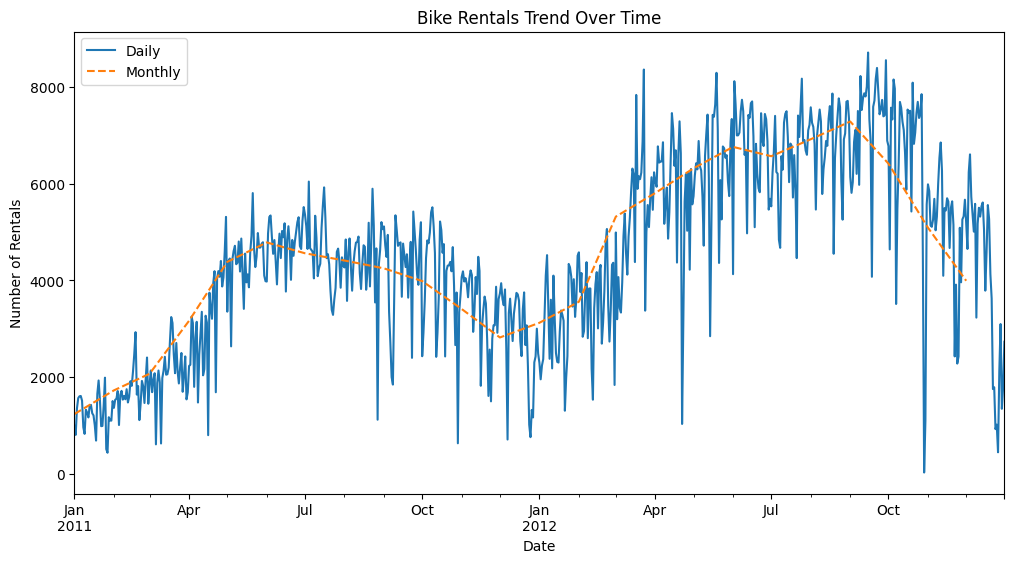

In [24]:
# Visualizing the trend
day_df.set_index('date', inplace=True)
plt.figure(figsize=(12, 6))
day_df['total_rentals'].resample('D').mean().plot(label='Daily')
day_df['total_rentals'].resample('M').mean().plot(label='Monthly', linestyle='dashed')
plt.title("Bike Rentals Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.legend()
plt.show()

Insight
*   Berdasarkan visualisasi tersebut, terdapat pola musiman yang cukup jelas Penyewaan sepeda meningkat signifikan dari Maret hingga Juni, dengan puncak sekitar bulan Mei–Juli. Ini menunjukkan bahwa saat cuaca lebih hangat (musim semi dan awal musim panas), lebih banyak orang menggunakan layanan bike sharing.
*   Penurunan mulai terjadi sekitar Oktober hingga Desember, dengan titik terendah di bulan Desember–Januari, yang kemungkinan besar disebabkan oleh musim dingin yang membuat orang enggan bersepeda.
*   Ini menarik, karena berdasarkan visualisasi countplot untuk melihat distribusi musiman sebelumnya, menunjukkan bahwa musim gugur justru memiliki distribusi tertinggi, walau perbedaan antara musim-musim lainnya tidak signifikan. Maka dari itu, analisis pola dan tren musiman seperti ini cukup penting, agar terhindar dari pengambilan keputusan yang kurang tepat.
*   Data harian menunjukkan banyak fluktuasi, yang bisa disebabkan oleh faktor cuaca harian, akhir pekan vs hari kerja, atau event tertentu.
*   Tren bulanan lebih stabil, dengan pola naik di musim semi dan panas serta turun di musim gugur dan dingin.
*   Dari Januari 2011 hingga akhir 2012, jumlah penyewaan sepeda meningkat secara umum. Ini bisa menunjukkan bahwa layanan bike sharing semakin populer seiring waktu.

Rekomendasi
*   Karena terdapat peningkatan penyewaan pada Maret–Juli, baik di tahun 2011 maupun 2012, perusahaan bisa meningkatkan jumlah sepeda yang tersedia, memastikan perawatan optimal, serta menyediakan promosi khusus untuk menarik lebih banyak pengguna. Sedangkan tren penurunan di bulan Oktober, perusahaan bisa mengantisipasi ini dengan kampanye pemasaran seperti memberikan diskon, program-program menarik, atau bahkan mengadakan event bersepeda musiman untuk mempertahankan pengguna agar tetap ramai di bulan-bulan yang rentan untuk sepi pelanggan.
*   Tren menunjukkan peningkatan penyewaan sepeda dari 2011 hingga 2012, yang mengindikasikan popularitas bike sharing semakin meningkat. Perusahaan dapat ,mencoba untuk memperluas layanan ke lebih banyak wilayah, terutama area dengan infrastruktur ramah sepeda.











### Pertanyaan 2
* Bagaimana tren penyewaan sepeda untuk untuk pengguna biasa (*casual*) dan terdaftar (*registered*)? Apakah ada perbedaan?

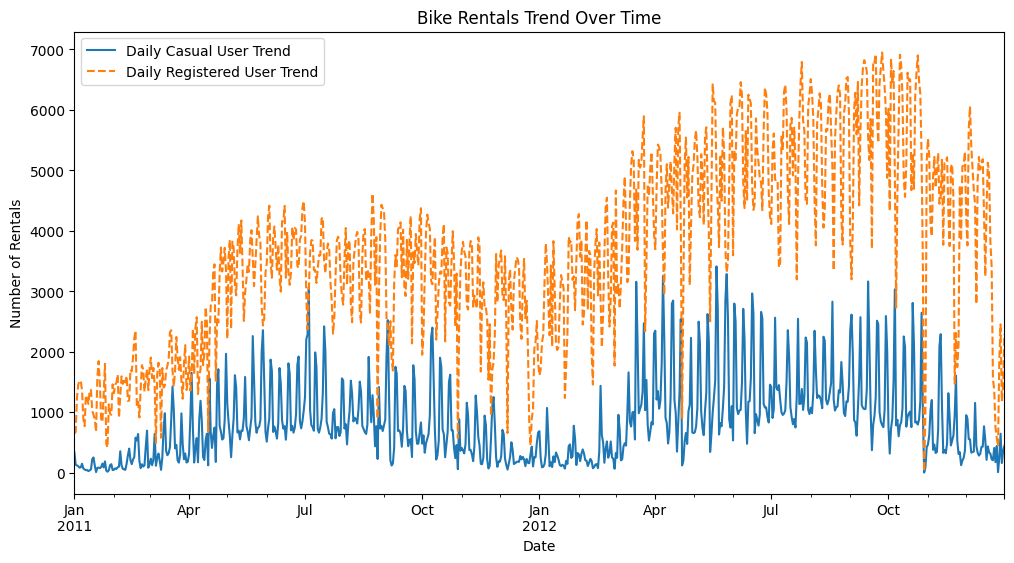

In [25]:
# Visualizing the trend
plt.figure(figsize=(12, 6))
day_df['casual_rentals'].resample('D').mean().plot(label='Daily Casual User Trend')
day_df['registered_rentals'].resample('D').mean().plot(label='Daily Registered User Trend', linestyle='dashed')
plt.title("Bike Rentals Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.legend()
plt.show()

Pola penyewaan sepeda antara pengguna biasa dan pengguna terdaftar terlihat cukup mirip. Namun, secara kuantitas, pengguna terdaftar lebih sering menyewa sepeda. Hal ini masuk akal karena pengguna terdaftar kemungkinan membutuhkan sepeda untuk aktivitas sehari-hari, sedangkan pengguna biasa lebih cenderung menggunakan sepeda untuk kesenangan atau hobi.

Selain itu, ada tren peningkatan yang signifikan pada pengguna terdaftar dibandingkan dengan pengguna biasa. Hal ini menunjukkan kemungkinan bahwa banyak pengguna biasa yang akhirnya memutuskan untuk berlangganan. Meski demikian, ada penurunan yang cukup mencolok pada akhir tahun, yang kemungkinan dipengaruhi oleh faktor musim dan cuaca.

Rekomendasi untuk mendorong lebih banyak pengguna biasa beralih menjadi pengguna terdaftar adalah dengan menawarkan promosi seperti uji coba gratis atau sistem hadiah untuk pengguna baru. Sementara itu, untuk meningkatkan retensi pengguna terdaftar, personalisasi layanan dapat menjadi strategi yang baik agar mereka merasa layanan ini semakin sesuai dengan kebutuhan dan preferensi mereka.

### Pertanyaan 3
* Apakah kondisi lingkungan seperti suhu, kelembapan, dsb berpengaruh terhadap penyewa sepeda?

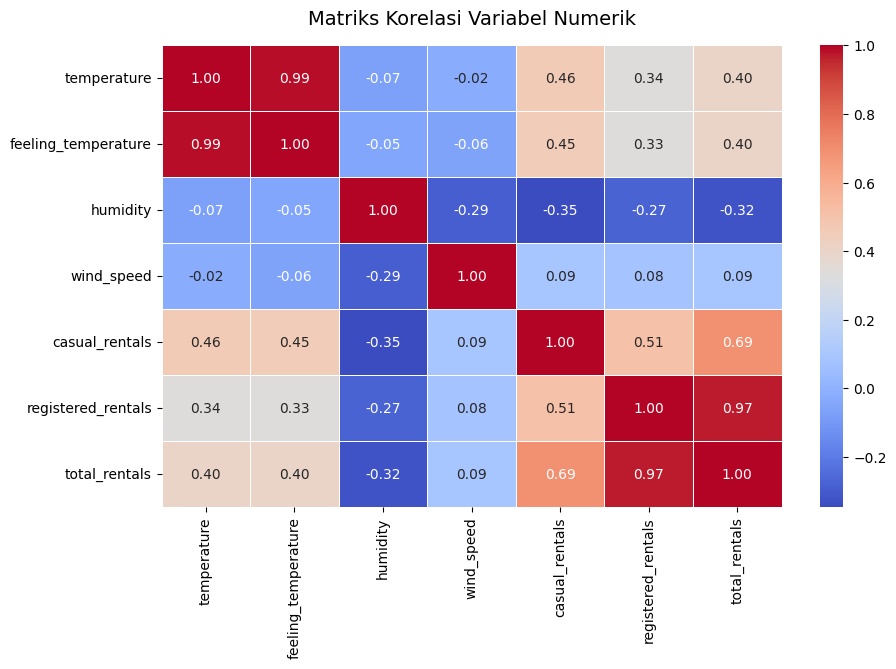

In [26]:
# Pilih hanya kolom numerik
num_cols = hour_df.select_dtypes(include=["int64", "float64"]).columns

# Hitung korelasi
corr_matrix = hour_df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Tambahkan judul
plt.title("Matriks Korelasi Variabel Numerik", fontsize=14, pad=15)

plt.show()

Faktor lingkungan seperti suhu, kelembapan, kecepatan angin, dan sebagainya memang memengaruhi jumlah penyewa sepeda. Namun, pengaruh tersebut relatif kecil, dengan kontribusi yang kurang dari 50%. Oleh karena itu, faktor-faktor tersebut bukanlah elemen yang memberikan dampak signifikan terhadap ekosistem *bike sharing* ini.

## Analisis Lanjutan

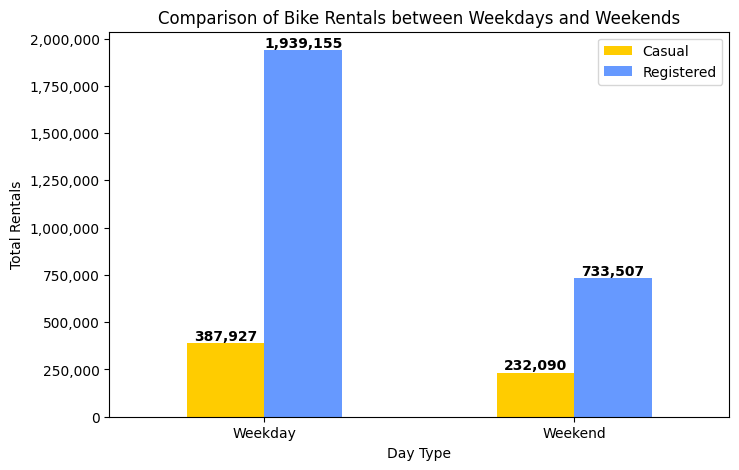

In [27]:
# Clusterize weekday and weekend usage

# Kategorisasi hari menjadi weekday dan weekend
hour_df["day_type"] = hour_df["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

# Aggregate total rentals by day type
weekday_vs_weekend = hour_df.groupby("day_type")[["casual_rentals", "registered_rentals"]].sum()

# Visualization
ax = weekday_vs_weekend.plot(kind="bar", figsize=(8, 5), color=["#FFCC00", "#6699FF"])
plt.title("Comparison of Bike Rentals between Weekdays and Weekends")
plt.xlabel("Day Type")
plt.ylabel("Total Rentals")
plt.xticks(rotation=0)
plt.legend(["Casual", "Registered"])

# Display actual numbers on the Y-axis without scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Text position
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold')

plt.show()

Pada tahap analisis lanjutan ini, saya melakukan pengelompokan (klasterisasi) penyewaan sepeda berdasarkan tipe hari dalam seminggu, yaitu weekday (Senin hingga Jumat) dan weekend (Sabtu dan Minggu). Dengan demikian, terdapat dua klaster yang dianalisis untuk melihat klaster mana yang memiliki total_rentals paling tinggi.

Hasil analisis menunjukkan bahwa klaster weekday mendominasi jumlah penyewaan, baik untuk pengguna biasa maupun pengguna terdaftar. Hal yang menarik adalah terdapat perbedaan yang signifikan antara jumlah penyewa terdaftar pada klaster weekday dibandingkan dengan klaster weekend. Ini mengindikasikan bahwa pengguna terdaftar cenderung menggunakan sepeda sebagai alat transportasi sehari-hari. Profesi mereka dapat diasumsikan sebagai pelajar, karyawan, atau ibu rumah tangga yang memiliki rutinitas bolak-balik ke sekolah, kantor, atau pasar. Oleh karena itu, memperhatikan kebutuhan segmen ini menjadi hal yang penting.

Sementara itu, untuk pengguna biasa, meskipun jumlah penyewaan pada klaster weekday lebih besar, perbedaannya tidak terlalu signifikan dibandingkan dengan weekend. Hal ini menunjukkan bahwa pengguna biasa cenderung memanfaatkan penyewaan sepeda untuk hobi atau rekreasi. Oleh karena itu, target yang relevan untuk segmen ini adalah komunitas atau individu yang memiliki ketertarikan pada bersepeda santai. Dengan demikian, strategi optimalisasi penyewaan sepeda dapat dirancang dengan pendekatan yang berbeda untuk masing-masing segmen pengguna, sehingga hasil yang lebih efektif dapat dicapai.

## Conclusion

- Analisis penyewaan sepeda menunjukkan tren musiman yang jelas, dengan lonjakan penyewaan pada Maret–Juli dan penurunan di Oktober–Januari. Secara keseluruhan, jumlah penyewaan meningkat dari 2011 ke 2012, menandakan pertumbuhan popularitas layanan ini. **Rekomendasi**: Optimalkan kapasitas di bulan puncak, terapkan strategi pemasaran kreatif di musim sepi, dan pertimbangkan ekspansi ke wilayah baru yang ramah sepeda.

- Pengguna terdaftar mendominasi penyewaan dibandingkan pengguna biasa, dengan tren peningkatan jumlah pelanggan tetap. **Rekomendasi**: Dorong pengguna biasa untuk berlangganan melalui promosi dan tingkatkan retensi dengan layanan personal seperti rekomendasi rute dan paket langganan fleksibel.

- Faktor cuaca memang berpengaruh, tetapi dampaknya relatif kecil. **Rekomendasi**: Fokus pada strategi non-lingkungan seperti promosi dan ketersediaan sepeda, serta manfaatkan informasi cuaca untuk meningkatkan pengalaman pengguna.

- Penyewaan lebih tinggi pada weekday, terutama oleh pengguna terdaftar yang kemungkinan menggunakan sepeda untuk transportasi harian. Sementara itu, pengguna biasa ada kemungkinan memanfaatkan layanan untuk rekreasi dengan pola penyewaan lebih seimbang antara weekday dan weekend. **Rekomendasi**: Optimalkan layanan berbasis tipe pengguna, misalnya program langganan bagi pengguna terdaftar dan promo khusus untuk pengguna biasa di akhir pekan.